In [1]:
#抓取資料
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [2]:
#整理資料成 DataFrame
import pandas as pd
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["target"] = iris["target"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
#切割資料 , 90%訓練, 10% 測試
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(["target"], axis=1), df["target"], test_size=0.1)

In [4]:
#開始訓練
from sklearn.cluster import KMeans
clu = KMeans(n_clusters=3)
#分群時是不曉得答案，因此不能把y代入，直接帶入 x_train讓他分成3類
clu.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
#這邊有90%的資料，0->setosa, 1-> vercicolor 2->viginica 但是，這邊一開始都沒有告訴機器這三群正確答案，因此下面的分群是機器分出來的，因此不一定是正確
clu.labels_

array([1, 2, 0, 1, 0, 2, 2, 0, 1, 1, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1,
       2, 0, 0, 2, 2, 0, 1, 2, 1, 2, 0, 0, 1, 0, 1, 0, 2, 2, 0, 2, 2, 1,
       1, 0, 1, 1, 0, 2, 2, 2, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 1, 2, 0, 2,
       0, 1, 2, 0, 2, 1, 1, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 0, 1, 2, 0, 1,
       1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0,
       1, 2, 1, 0, 2, 0, 0, 0, 2, 0, 2, 1, 0, 2, 0, 2, 1, 0, 1, 0, 0, 0,
       2, 0, 1])

In [27]:
#平常就不用去驗證，這邊老師 特別拿出來講解
print("預測結果:", list(clu.predict(x_test)))
print("正確結果:", list(y_test))
from sklearn.metrics import accuracy_score
score = accuracy_score(clu.predict(x_test), y_test)
print("正確率:", score)

預測結果: [1, 1, 1, 4, 0, 2, 2, 0, 1, 2, 4, 1, 1, 1, 1]
正確結果: [0, 0, 0, 1, 2, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0]
正確率: 0.0


In [28]:
#用 Kmeans來分群, 我要從0~跑到5群，看哪一群比較好, 同時用silhouette score去看哪一種分得比較好
from sklearn.metrics import silhouette_score
x = df.drop(["target"], axis=1)
plotx = []
ploty = []
for i in range(2, 6):
    clu = KMeans(n_clusters=i)
    clu.fit(x)
    s = silhouette_score(x, clu.labels_)
    #不要設定一個變數給append
    plotx.append(i)
    ploty.append(s)
print("k值:", plotx)
print("score:", ploty)

k值: [2, 3, 4, 5]
score: [0.681046169211746, 0.5528190123564091, 0.49721766487109686, 0.4887488870931048]


In [ ]:
#以上面的例子，我們要選分兩群， k=2 的值，因為 silhouette score =0.68 是數值最高，數值最高表示分群分越好

Text(0, 0.5, 'score')

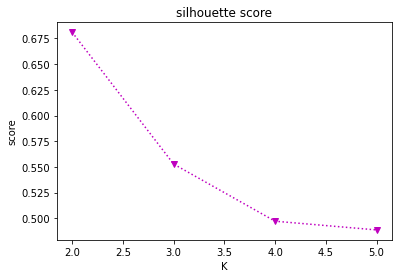

In [49]:
#畫圖
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(plotx, ploty, "mv:")
plt.title("silhouette score")
plt.xlabel("K")
plt.ylabel("score")